# Task

This week’s assignment involves decision trees, and more specifically, classification trees. Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both. Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.

Run a Classification Tree.

You will need to perform a decision tree analysis to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable.

# Data

Dataset is here: https://yadi.sk/d/6sjQ8yb_3QkEXM

Description of variables:


Name -- Data Type -- Measurement -- Description 

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable 

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable 

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable 

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable 

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable 

Fine Aggregate (component 7)	-- quantitative -- kg in a m3 mixture -- Input Variable 

Age -- quantitative -- Day (1~365) -- Input Variable 

Concrete compressive strength -- binary(1 - quite good strength, 0 - not quite good strength) -- Output Variable 

# Solution

Generated decision tree can be found below:

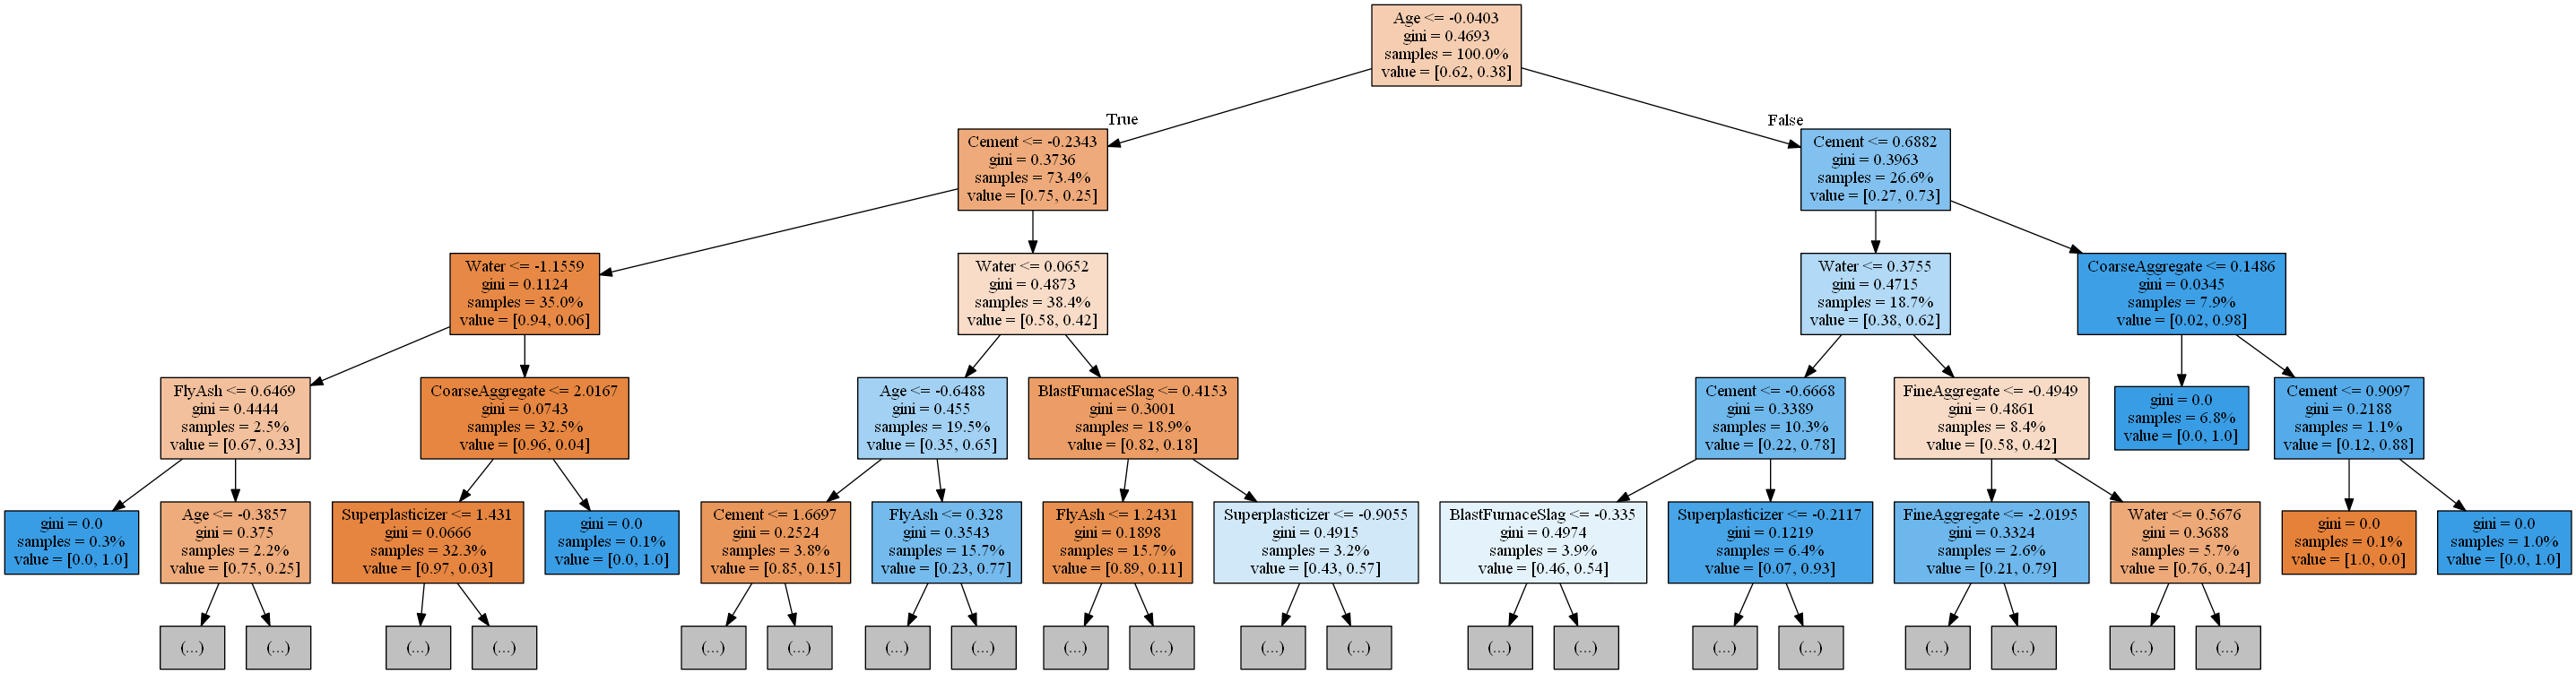

In [18]:
img

Decision tree analysis was performed to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable.

The dataset was splitted into train and test samples in ratio 70\30.

After fitting the tree I’ve tested it on test dataset and got accuracy = 0,909. This is a good result for a model, which is based only on three explaining variables.

The range of features importance:   
Age                 0.329110  
Cement              0.239161  
Water               0.153206  
BlastFurnaceSlag    0.073135  
FineAggregate       0.069836  
FlyAsh              0.062594  
Superplasticizer    0.039782  
CoarseAggregate     0.033177

# Code

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
import pydotplus
from IPython.display import Image
rnd_state = 23468

Data loading

In [3]:
df = pd.read_csv("Concrete_Data_coursera.csv", sep=";")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,42492.0,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,42492.0,1055.0,676.0,28,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1


In this task I will predict the strength of concrete. First, let's look at the scale of the signs: there are no passes and, in addition, all the signs except Age (in days) and ConcreteCompressiveStrength (binary attribute) are given in the same measure - kilogram per cubic meter.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1027.0,280.950925,104.571575,102.00,192.0,272.80,350.00,540.0
BlastFurnaceSlag,1027.0,74.060419,86.351035,0.00,0.0,22.00,143.00,359.4
FlyAsh,1027.0,53.879017,63.834788,0.00,0.0,0.00,118.27,200.1
Water,1027.0,181.587488,21.375824,121.75,164.9,185.00,192.00,247.0
Superplasticizer,1027.0,15588.141008,18042.839610,0.00,0.0,13.93,33512.00,46235.0
CoarseAggregate,1027.0,972.907644,77.863637,801.00,932.0,968.00,1029.40,1145.0
FineAggregate,1027.0,773.971032,79.961308,594.00,733.5,780.00,824.50,992.6
Age,1027.0,45.713729,63.254967,1.00,7.0,28.00,56.00,365.0
ConcreteCompressiveStrength,1027.0,0.366115,0.481976,0.00,0.0,0.00,1.00,1.0


Analysis of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000085BB3EA8D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000085BBB0CDD8>]], dtype=object)

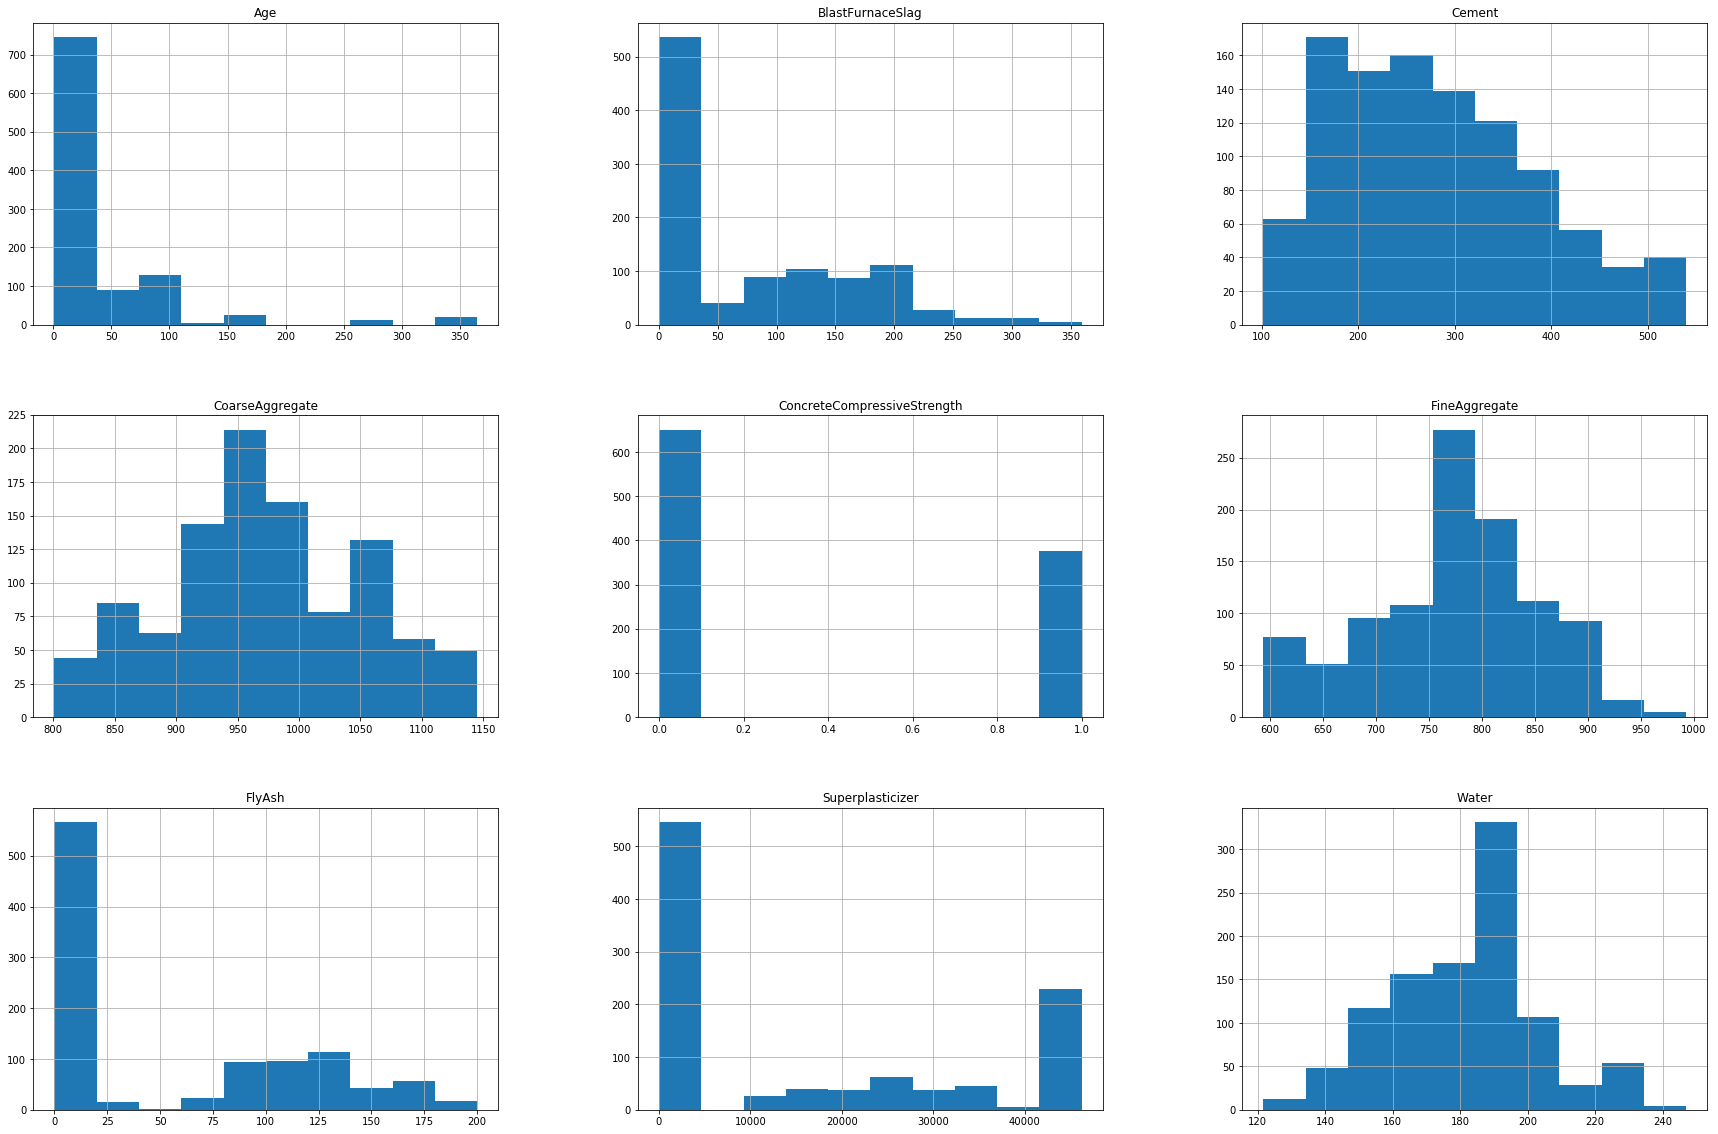

In [5]:
df.hist(figsize=(30, 20))

We see that the distribution of the Water, CoarseAggregate and FineAggregate characteristics is similar to normal, and the Cement distribution is similar to the chi-square distribution. The distribution of the target attribute of ConcreteCompressiveStrength is similar to chi-square. In the signs of BlastFurnaceSlag and FlyAsh there is a significant skew in the direction of small values and this is logical, since these signs are impurities in a mixture of concrete, there should be few of them.

Making train test splits

In [6]:
df.shape

(1027, 9)

In [7]:
df.dropna().shape

(1027, 9)

In [8]:
X = df.drop('ConcreteCompressiveStrength', 1)
y = df['ConcreteCompressiveStrength']

We see that there are no omissions in the data. In addition, there are no categorical signs either.

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3/10, random_state=rnd_state)

We normalize the characteristics for better work of learning algorithms.

In [10]:
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((718, 8), (309, 8), (718,), (309,))

In [12]:
from sklearn.metrics import mean_absolute_error as MAE

In [13]:
y_train2 = np.asarray(y_train, dtype="|S6")
y_test2 = np.asarray(y_test, dtype="|S6")

Decision tree

In [14]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train2)
predictedDTC = dtc.predict(X_test)
predictedDTC = np.asarray(predictedDTC, dtype="float")

Accuracy

In [16]:
print('Confusion matrix:\n', pd.crosstab(y_test,predictedDTC, colnames=['Actual'], rownames=['Predicted'], margins=True))
print('\nAccuracy: ', accuracy_score(y_test,predictedDTC))

Confusion matrix:
 Actual     0.0  1.0  All
Predicted               
0          187   16  203
1           14   92  106
All        201  108  309

Accuracy:  0.902912621359


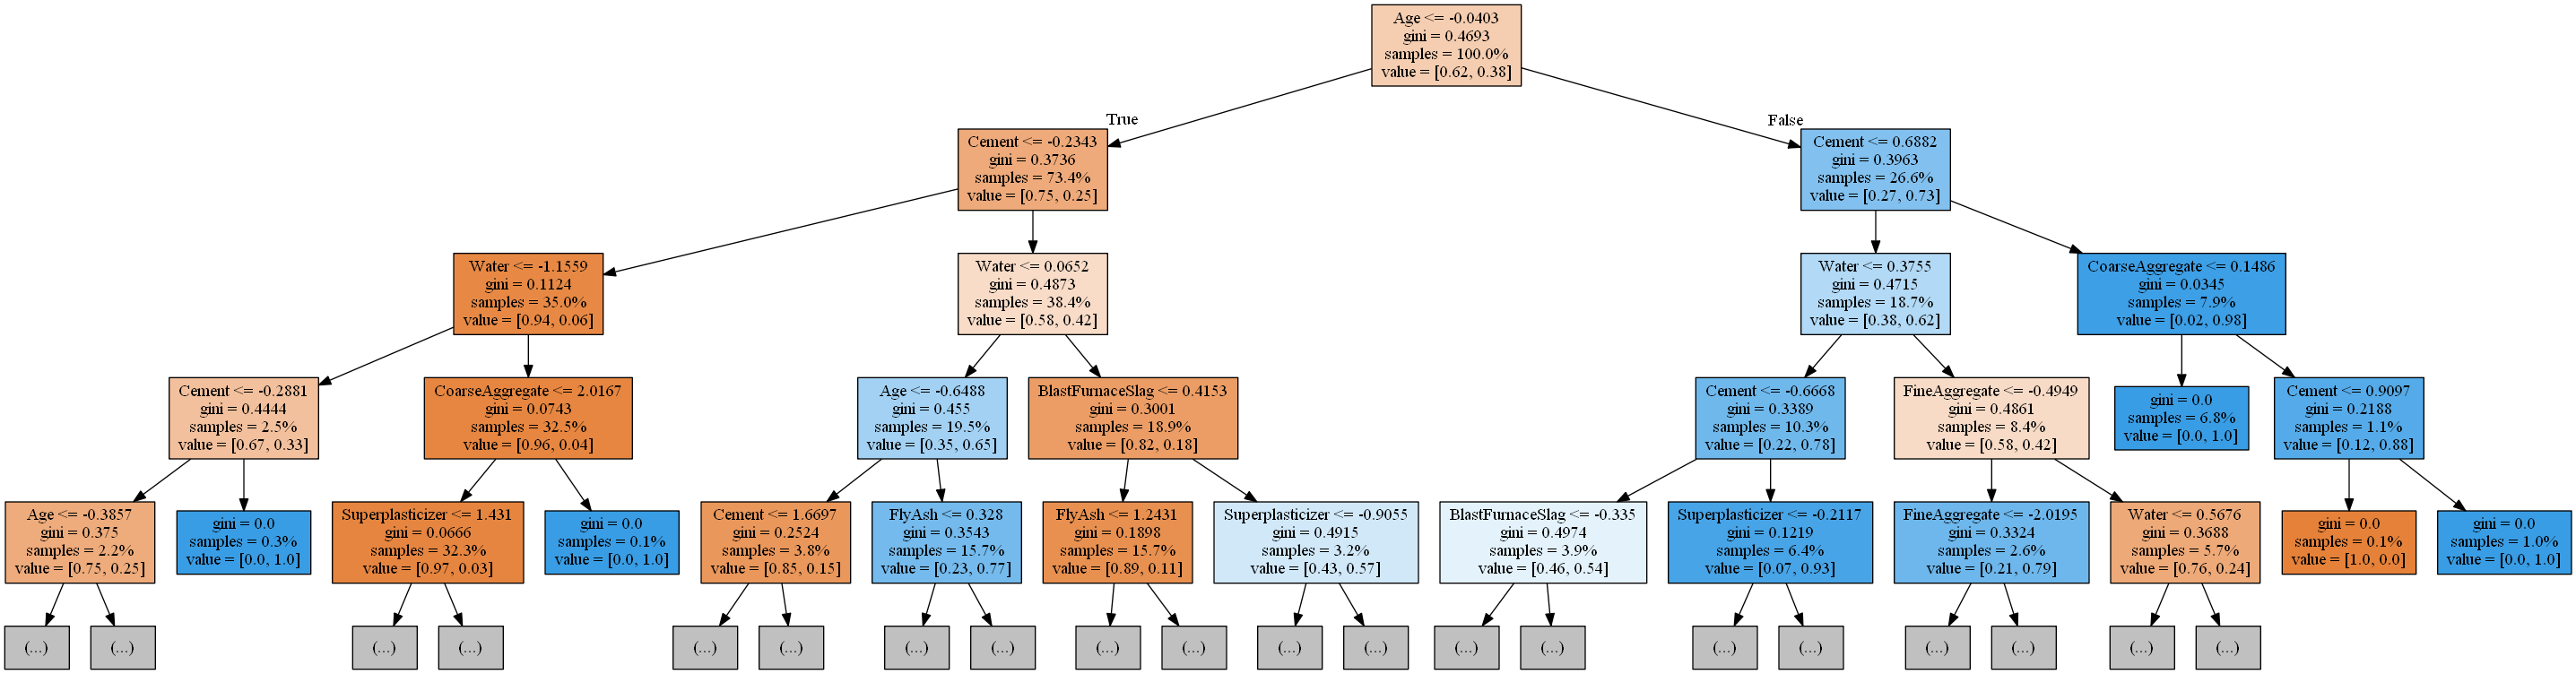

In [17]:
out = StringIO()
tree.export_graphviz(dtc, out_file = out, feature_names = X.columns.values, 
                     proportion = True, filled = True, max_depth = 4)
graph = pydotplus.graph_from_dot_data(out.getvalue())
img=Image(data = graph.create_png())
img

In [18]:
feature_importance = pd.Series(dtc.feature_importances_, index=df.columns.values[:8]).sort_values(ascending=False)
feature_importance

Age                 0.328324
Cement              0.240651
Water               0.162633
BlastFurnaceSlag    0.066182
FineAggregate       0.063620
FlyAsh              0.060069
CoarseAggregate     0.040850
Superplasticizer    0.037672
dtype: float64